In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model, Sequential
import os, sys, json, csv
import glob
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import metrics
from sklearn.svm import SVR
from scipy.stats.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Using TensorFlow backend.


In [0]:
!cd /content/gdrive/My\ Drive/Deep\ Learning\ for\ Mental\ Health/Bellevue; ls;

500_cities_Bellevue_mental_health.csv	  filenames_fc7_z18_vgg_Bellevue.npy
download_Bellevue_tract_18_imgs_locs.csv  img
extracted_socio_Bellevue_features.npy	  shape
extracted_socio_Bellevue_tracts.npy	  socioeconomic_data_v2.csv
features_tracts_fc7_z18_vgg_Bellevue.npy  socioeconomic_data_v2.gsheet


In [0]:
root_dir = "gdrive/My Drive/Deep Learning for Mental Health/"

In [0]:
def feature_selection(tract_path, features_path, csv_path, is_text=False):
  # Load data
  if is_text:
    t1 = np.loadtxt(features_path)
    t2 = np.loadtxt(tract_path)
  else:
    t1 = np.load(features_path)
    t2 = np.load(tract_path)
  csv = pd.read_csv(csv_path)

  # Initialize target variables
  features = pd.DataFrame(t1)
  tracts = pd.DataFrame({"TractFIPS": t2})
  tracts.TractFIPS = tracts.TractFIPS.astype('int64')
  csv_data = pd.merge(tracts, csv, on=['TractFIPS'])

  # Prepare data for models
  X = features
  y = csv_data['Data_Value']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # GBR
  gbr_model = GradientBoostingRegressor()
  gbr_model.fit(X_train, y_train)

  # Feature selection
  rfe_selector = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=2, verbose=5)
  rfe_selector.fit(X_train, y_train)
  rfe_support = rfe_selector.get_support()
  rfe_feature = X.loc[:,rfe_support].columns.tolist()
  print(str(len(rfe_feature)), 'selected features')
  print(rfe_feature)

  importances = gbr_model.feature_importances_

  print(importances)
  
  # Generate plot
  # Sort feature importances in descending order
  # Create plot
  plt.figure()

  # Create plot title
  plt.title("Feature Importance")

  # Add bars
  plt.bar(range(X.shape[1]), importances)

  # Add feature names as x-axis labels
  plt.xticks(range(X.shape[1]), rotation=90)

  # Show plot
  plt.show()

  

def modelOutputs(tract_path, features_path, csv_path, is_text=False, isSocio=False):
  # Load data
  if is_text:
    t1 = np.loadtxt(features_path)
    t2 = np.loadtxt(tract_path)
  else:
    t1 = np.load(features_path)
    t2 = np.load(tract_path)
  csv = pd.read_csv(csv_path)

  # Initialize target variables
  features = pd.DataFrame(t1)
  if (isSocio == True):
    features = features[features.columns[[0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]]]
  tracts = pd.DataFrame({"TractFIPS": t2})
  tracts.TractFIPS = tracts.TractFIPS.astype('int64')
  csv_data = pd.merge(tracts, csv, on=['TractFIPS'])

  # Prepare data for models
  X = features
  y = csv_data['Data_Value']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  lr_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
  las_scores = cross_val_score(Lasso(alpha=0.1), X, y, cv=5, scoring='r2')
  svr_scores = cross_val_score(SVR(gamma='scale', C=1.0, epsilon=0.2), X, y, cv=5, scoring='r2')
  gbr_scores = cross_val_score(GradientBoostingRegressor(), X, y, cv=5, scoring='r2')


  print("SVR:")
  print(np.mean(svr_scores))
  print("\nLASSO:")
  print(np.mean(las_scores))
  print("\nLINEAR:")
  print(np.mean(lr_scores))
  print("\nGBR:")
  print(np.mean(gbr_scores))


## Feature Selection for socioeconomic data

Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
10 selected features
[0, 1, 5, 8, 9, 10, 14, 17, 18, 19]
[1.02704746e-02 2.53452571e-03 2.55224085e-03 2.32716633e-03
 2.14312936e-03 2.06398365e-03 2.29076903e-03 3.33710370e-03
 7.45434241e-03 1.09899439e-02 4.81094629e-03 9.38336158e-04
 1.53991593e-03 1.89178008e-03 4.43250637e-03 3.03875321e-04
 4.68315397e-03 9.10231156e-01 1.90694539e-02 3.56524258e-03
 2.56995426e-03]


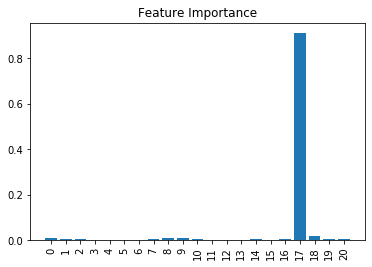

In [0]:
la_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
la_features_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"
la_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
feature_selection(la_tract_path,la_features_path, la_csv_path, False)

Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
10 selected features
[0, 4, 5, 10, 13, 14, 16, 17, 18, 20]
[5.90247894e-02 1.32658865e-03 5.86856921e-04 3.46992008e-03
 4.01277211e-03 9.55967116e-02 4.94762430e-03 2.28636863e-03
 3.50765769e-05 2.26578367e-03 3.84702652e-03 1.49115751e-03
 4.39652675e-04 1.74978634e-02 1.10343015e-02 5.29377414e-05
 5.94978528e-03 7.42620673e-01 1.18372807e-02 1.48296277e-02
 1.68472022e-02]


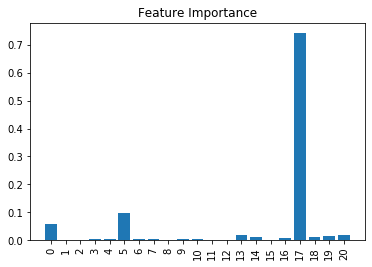

In [0]:
# Make sure it is consistent with Bellevue
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
feature_selection(bellevue_tract_path,bellevue_features_path, bellevue_csv_path, False)

In [0]:
socio_feature_cols = [0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]
# Selected features
# ------------------------------------------
# 0: Population Density (Per Sq. Mile)
# 1: Normalized Male population
# 2: Normalized Female population
# 3: Normalized 18-24 population
# 4: Normalized 25-34 population
# 5: Normalized 35-44 population
# 6: Normalized 45-54 population
# 7: Normalized 55-64 population
# 9: Normalized 75-84 population
# 11: Family household
# 12: Nonfamily Household
# 13: Normalized population in Labor Force
# 14: Normalized population not in labor force
# 15: Armed labor force
# 17: Per capita income
# 18: Gini Index
# -------------------------------------------
# 16: Unemployed labor force
# 19: Native born
# 20: Foreign born

## Model outputs

Train and test on Bellevue satellite images ONLY

In [0]:
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
modelOutputs(bellevue_tract_path,bellevue_features_path, bellevue_csv_path, False)

SVR:
-0.4986020337984211

LASSO:
-1.3917599907088678

LINEAR:
-2.5080859048482393

GBR:
-1.5429123891686036


Train and test on Bellevue socioeconomic census ONLY

In [0]:
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
modelOutputs(bellevue_tract_path,bellevue_features_path, bellevue_csv_path, False, True)

SVR:
-0.36352208163477895

LASSO:
-1.074502510699169

LINEAR:
-1.3397781358519272

GBR:
0.1930116770515689


Train and test on LA satellite images ONLY

In [0]:
la_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
la_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
la_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
modelOutputs(la_tract_path,la_features_path, la_csv_path, True)

SVR:
0.31817697230500624

LASSO:
0.28775835550219164

LINEAR:
0.06403924429020538

GBR:
0.3834394531504629


Train and test on LA socioeconomic census ONLY



In [0]:
la_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
la_features_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"
la_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
modelOutputs(la_tract_path,la_features_path, la_csv_path, False, True)

SVR:
0.7981256449461624

LASSO:
0.4594344863879683

LINEAR:
0.5053522410723916

GBR:
0.8734795941406197


Train and test on San Antonio satellite images ONLY


In [0]:
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
modelOutputs(tract_path, features_path, csv_path, True)

SVR:
0.22461598905323021

LASSO:
0.3003021881590316

LINEAR:
0.24694554061549087

GBR:
0.2754168778984975


Train and test on San Antonio socioeconomic census ONLY


In [0]:
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
modelOutputs(tract_path, features_path, csv_path, False)

SVR:
0.6719966464148719

LASSO:
0.31284580537826945

LINEAR:
0.6517433768572063

GBR:
0.7378609291086992


Train and test on Memphis satellite images ONLY


In [0]:
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
modelOutputs(tract_path, features_path, csv_path, True)

SVR:
-0.03000710418875483

LASSO:
0.2237582111583619

LINEAR:
0.039686059398181414

GBR:
0.16624914902270455


Train and test on Memphis socioeconomic census ONLY


In [0]:
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
modelOutputs(tract_path, features_path, csv_path, False)

SVR:
0.7313543429239007

LASSO:
0.5375904526914027

LINEAR:
0.6275256879092377

GBR:
0.7808513840874209


## Combination of socioeconomic and image features

In [0]:
def modelComboOutputs(tract_path,features_path,tract_path_s, features_path_s, csv_path, is_Text=True):
  if is_Text == True:
    t1 = np.loadtxt(features_path)
    t2 = np.loadtxt(tract_path)
  else :
    t1 = np.load(features_path)
    t2 = np.load(tract_path)
  t3 = np.load(features_path_s)
  t4 = np.load(tract_path_s)

  csv = pd.read_csv(csv_path)

  # Initialize target variables
  features = pd.DataFrame(t1)
  features['TractFIPS'] = t2
  features.TractFIPS = features.TractFIPS.astype('int64')

  # Prepare data for models
  features_s = pd.DataFrame(t3)

  # Feature selection applied
  features_s = features_s[features_s.columns[[0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]]]
  features_s['TractFIPS'] = t4
  features_s.TractFIPS = features_s.TractFIPS.astype('int64')

  full_features = pd.merge(features, features_s, on=['TractFIPS'])
  full_data = pd.merge(full_features, csv, on=['TractFIPS'])
  full_data = full_data.drop(columns=['TractFIPS'])
  X = full_data[full_data.columns[0:4106]]
  y = full_data['Data_Value']

  lr_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
  las_scores = cross_val_score(Lasso(alpha=0.1), X, y, cv=5, scoring='r2')
  svr_scores = cross_val_score(SVR(gamma='scale', C=1.0, epsilon=0.2), X, y, cv=5, scoring='r2')
  gbr_scores = cross_val_score(GradientBoostingRegressor(), X, y, cv=5, scoring='r2')

  print("SVR:")
  print(np.mean(svr_scores))
  print("\nLASSO:")
  print(np.mean(las_scores))
  print("\nLINEAR:")
  print(np.mean(lr_scores))
  print("\nGBR:")
  print(np.mean(gbr_scores))


Train and test on LA ONLY

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"
modelComboOutputs(tract_path, features_path, tract_path_s, features_path_s, csv_path)

SVR:
0.7987027999951012

LASSO:
0.6012299249056591

LINEAR:
0.4414190446306283

GBR:
0.8459403245479699


Train and test on Bellevue ONLY

In [0]:
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
bellevue_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"

modelComboOutputs(bellevue_tract_path, bellevue_features_path, bellevue_tract_path_s, bellevue_features_path_s, bellevue_csv_path, False)

SVR:
-0.16592815813149545

LASSO:
-0.4394532595971805

LINEAR:
-1.85145497642756

GBR:
0.20260819617984543


Train and test on Memphis ONLY

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"
modelComboOutputs(tract_path, features_path, tract_path_s, features_path_s, csv_path)

SVR:
0.7317710511339912

LASSO:
0.6221375302789909

LINEAR:
0.1944816992424603

GBR:
0.7588032910167595


Train and test San Antonio ONLY

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"
modelComboOutputs(tract_path, features_path, tract_path_s, features_path_s, csv_path)

SVR:
0.6690515774982005

LASSO:
0.4737573664355218

LINEAR:
0.4572517752659831

GBR:
0.7372491824488351


## Multi-modal cross city

In [0]:
def multimodal_cc(city, tract_path,features_path,tract_path_s, features_path_s, csv_path, target_tract, target_features, target_tract_s, target_features_s, target_path, is_Text=True, is_Text2=True):
  if is_Text == True:
    t1 = np.loadtxt(features_path)
    t2 = np.loadtxt(tract_path)
  else :
    t1 = np.load(features_path)
    t2 = np.load(tract_path)
  t3 = np.load(features_path_s)
  t4 = np.load(tract_path_s)

  csv = pd.read_csv(csv_path)

  # Initialize target variables
  features = pd.DataFrame(t1)
  features['TractFIPS'] = t2
  features.TractFIPS = features.TractFIPS.astype('int64')

  # Prepare data for models
  # [0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]
  # [0, 1, 2, 3, 4, 7, 9, 13, 17, 18]
  features_s = pd.DataFrame(t3)
  features_s = features_s[features_s.columns[[0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]]]
  features_s['TractFIPS'] = t4
  features_s.TractFIPS = features_s.TractFIPS.astype('int64')

  full_features = pd.merge(features, features_s, on=['TractFIPS'])
  full_data = pd.merge(full_features, csv, on=['TractFIPS'])
  full_data = full_data.drop(columns=['TractFIPS'])
  X = full_data[full_data.columns[0:4106]]
  y = full_data['Data_Value']
  
  X_train = X
  y_train = y

  # Preparing cross city
  if is_Text2 == True:
    t5 = np.loadtxt(target_features)
    t6 = np.loadtxt(target_tract)
  else:
    t5 = np.load(target_features)
    t6 = np.load(target_tract)

  t7 = np.load(target_features_s)
  t8 = np.load(target_tract_s)

  target_csv = pd.read_csv(target_path)

  pd_target_features = pd.DataFrame(t5)
  pd_target_features['TractFIPS'] = t6
  pd_target_features.TractFIPS = pd_target_features.TractFIPS.astype('int64')
  
  pd_target_features_s = pd.DataFrame(t7)
  pd_target_features_s = pd_target_features_s[pd_target_features_s.columns[[0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]]]
  pd_target_features_s['TractFIPS'] = t8
  pd_target_features_s.TractFIPS = pd_target_features_s.TractFIPS.astype('int64')

  # Prepare data for models
  target_full_features = pd.merge(pd_target_features, pd_target_features_s, on=['TractFIPS'])
  target_full_data = pd.merge(target_full_features, target_csv, on=['TractFIPS'])
  target_full_data = target_full_data.drop(columns=['TractFIPS'])
  X_test = target_full_data[target_full_data.columns[0:4106]]
  y_test = target_full_data['Data_Value']

  # Lasso
  las_model = Lasso(alpha=0.1)
  las_model.fit(X_train, y_train)

  # Linear
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)

  # SVR
  svr_model = SVR(gamma='scale', C=1.0, epsilon=0.2)
  svr_model.fit(X_train, y_train)

  # GBR
  gbr_model = GradientBoostingRegressor()
  gbr_model.fit(X_train, y_train)

  # Get prediction results
  y_pred_lr = lr_model.predict(X_test)
  y_pred_las = las_model.predict(X_test)
  y_pred_svr = svr_model.predict(X_test)
  y_pred_gbr = gbr_model.predict(X_test)

  # Get prediction df
  true_pred_df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
  true_pred_df_las = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_las})
  true_pred_df_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})
  true_pred_df_gbr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbr})

  export_df_gbr = target_full_data
  export_df_gbr['Predicted'] = y_pred_gbr

  export_df_svr = target_full_data
  export_df_svr['Predicted'] = y_pred_svr
  
  pd.to_pickle(export_df_gbr, "gdrive/My Drive/Deep Learning for Mental Health/" + city + "_pred_gbr.pkl")
  pd.to_pickle(export_df_svr, "gdrive/My Drive/Deep Learning for Mental Health/" + city + "_pred_svr.pkl")

  # Print results
  def printRes(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:', metrics.r2_score(y_test, y_pred))

  print("SVR:")
  printRes(y_test, y_pred_svr)
  print("\nLASSO:")
  printRes(y_test, y_pred_las)
  print("\nLINEAR:")
  printRes(y_test, y_pred_lr)
  print("\nGBR:")
  printRes(y_test, y_pred_gbr)

  print("\nFeature Importance")
  ft = (gbr_model.feature_importances_)
  print(ft)

# LA
Train LA, Test Bellevue

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
bellevue_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

multimodal_cc("la:bellevue", tract_path, features_path, tract_path_s, features_path_s, csv_path, bellevue_tract_path, bellevue_features_path,bellevue_tract_path_s, bellevue_features_path_s,bellevue_csv_path, is_Text2=False )

SVR:
Mean Absolute Error: 1.025517802596294
Mean Squared Error: 1.4907503262392825
Root Mean Squared Error: 1.220962868493257
R2: -0.7761321759974433

LASSO:
Mean Absolute Error: 3.182418504960732
Mean Squared Error: 10.957659655876267
Root Mean Squared Error: 3.310235589180363
R2: -12.055339680876243

LINEAR:
Mean Absolute Error: 13.956325736673673
Mean Squared Error: 210.73843042563894
Root Mean Squared Error: 14.516832658181293
R2: -250.08115048508571

GBR:
Mean Absolute Error: 2.0147933649435807
Mean Squared Error: 4.404174794229691
Root Mean Squared Error: 2.0986125879327253
R2: -4.247288176338584

Feature Importance
[0.         0.         0.         ... 0.00098779 0.         0.88893134]


Train LA, Test San Antonio

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

multimodal_cc("la:sa", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 1.0080000333086407
Mean Squared Error: 1.5527178369589187
Root Mean Squared Error: 1.2460809913319915
R2: 0.7798641911745232

LASSO:
Mean Absolute Error: 1.5984919155724233
Mean Squared Error: 3.5912150635978723
Root Mean Squared Error: 1.8950501480430202
R2: 0.4908572479339206

LINEAR:
Mean Absolute Error: 1.9920016182538955
Mean Squared Error: 6.367459516233537
Root Mean Squared Error: 2.523382554475943
R2: 0.09725655402087396

GBR:
Mean Absolute Error: 1.0308120213647858
Mean Squared Error: 1.6187383980117516
Root Mean Squared Error: 1.2722965055409654
R2: 0.7705041585526646

Feature Importance
[0.         0.         0.         ... 0.00098779 0.         0.88893134]


Train LA, Test Memphis

In [0]:
# Load data
tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

multimodal_cc("la:memphis", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 2.9489788472031666
Mean Squared Error: 11.84645747793289
Root Mean Squared Error: 3.44186831211377
R2: 0.10902252558197434

LASSO:
Mean Absolute Error: 3.179355696688703
Mean Squared Error: 15.015117039330496
Root Mean Squared Error: 3.8749344561334835
R2: -0.12929380641546184

LINEAR:
Mean Absolute Error: 4.804343328373146
Mean Squared Error: 31.634626101272598
Root Mean Squared Error: 5.624466739280498
R2: -1.3792546692016314

GBR:
Mean Absolute Error: 2.084064098354805
Mean Squared Error: 7.197159436365577
Root Mean Squared Error: 2.6827522130017107
R2: 0.4586983535338033

Feature Importance
[0.         0.         0.         ... 0.00098779 0.         0.88893134]


## Bellevue

Train Bellevue, test LA

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

multimodal_cc("bellevue:LA", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path, is_Text=False)

SVR:
Mean Absolute Error: 4.04808093712689
Mean Squared Error: 25.23466309487451
Root Mean Squared Error: 5.023411499655837
R2: -1.2346586148339966

LASSO:
Mean Absolute Error: 3.758130206792736
Mean Squared Error: 23.001007885229534
Root Mean Squared Error: 4.795936601460609
R2: -1.036857010032076

LINEAR:
Mean Absolute Error: 7.938938243031257
Mean Squared Error: 74.8096916650391
Root Mean Squared Error: 8.649259602130064
R2: -5.624781211614824

GBR:
Mean Absolute Error: 3.9991658199577045
Mean Squared Error: 24.03815308194204
Root Mean Squared Error: 4.902871921837448
R2: -1.1287015272326264

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.94252885e-08
 0.00000000e+00 6.75691863e-01]


Train Bellevue, Test Memphis

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

multimodal_cc("bellevue:memphis", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path, is_Text=False)

SVR:
Mean Absolute Error: 6.911770636635722
Mean Squared Error: 58.72600421448088
Root Mean Squared Error: 7.6632893860587625
R2: -3.4168095833836167

LASSO:
Mean Absolute Error: 5.520336686819335
Mean Squared Error: 39.59181587497072
Root Mean Squared Error: 6.292202783999473
R2: -1.977718544266465

LINEAR:
Mean Absolute Error: 8.74334582136736
Mean Squared Error: 85.73626572894398
Root Mean Squared Error: 9.259387978097903
R2: -5.448263681147024

GBR:
Mean Absolute Error: 6.961065624994993
Mean Squared Error: 59.2843791737087
Root Mean Squared Error: 7.699635002628936
R2: -3.458805218946214

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 9.52350209e-09 6.75704725e-01]


In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

multimodal_cc("bellevue:sa", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path, is_Text=False)

SVR:
Mean Absolute Error: 3.228146022585376
Mean Squared Error: 15.89892783676517
Root Mean Squared Error: 3.987345964017315
R2: -1.2540626864047475

LASSO:
Mean Absolute Error: 2.2885451083738384
Mean Squared Error: 8.970383719272885
Root Mean Squared Error: 2.995059885757359
R2: -0.2717717466198408

LINEAR:
Mean Absolute Error: 5.665798827579708
Mean Squared Error: 37.40545852102409
Root Mean Squared Error: 6.116000206100723
R2: -4.303140512728792

GBR:
Mean Absolute Error: 3.0716303847007143
Mean Squared Error: 14.793555348965034
Root Mean Squared Error: 3.846239117497121
R2: -1.097349044773702

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 9.52350209e-09 6.75704725e-01]


## San Antonio

Train San Antonio, test Los Angeles

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

multimodal_cc("sa:la", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 1.7325291056059873
Mean Squared Error: 5.377368546663277
Root Mean Squared Error: 2.3189153815228525
R2: 0.5238064838527927

LASSO:
Mean Absolute Error: 1.988224067743628
Mean Squared Error: 7.515672562143977
Root Mean Squared Error: 2.7414726995073244
R2: 0.3344487154782816

LINEAR:
Mean Absolute Error: 2.655574888672349
Mean Squared Error: 14.443588563616244
Root Mean Squared Error: 3.80047215009086
R2: -0.2790537163683635

GBR:
Mean Absolute Error: 1.2608059307786383
Mean Squared Error: 2.5711625729980105
Root Mean Squared Error: 1.6034845097468233
R2: 0.7723103901848498

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 7.76013270e-05 8.34987399e-01]


Train San Antonio, test Bellevue

In [0]:
# Load data
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
bellevue_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

multimodal_cc("sa:bellevue", tract_path, features_path, tract_path_s, features_path_s, csv_path, bellevue_tract_path, bellevue_features_path,bellevue_tract_path_s, bellevue_features_path_s,bellevue_csv_path, is_Text2=False )

SVR:
Mean Absolute Error: 0.7281949135604106
Mean Squared Error: 1.12407792995796
Root Mean Squared Error: 1.0602254146915928
R2: -0.3392658345167252

LASSO:
Mean Absolute Error: 1.3744667961161616
Mean Squared Error: 2.873661383938489
Root Mean Squared Error: 1.6951877134814566
R2: -2.423780868665221

LINEAR:
Mean Absolute Error: 1.6567792992551684
Mean Squared Error: 4.303237868955148
Root Mean Squared Error: 2.0744247079504112
R2: -4.127028386640179

GBR:
Mean Absolute Error: 1.5059938579195309
Mean Squared Error: 2.9282490521495417
Root Mean Squared Error: 1.711212743100501
R2: -2.4888185293759264

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 7.76013270e-05 8.34987399e-01]


Train San Antonio, Test Memphis

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

multimodal_cc("sa:memphis", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 3.193248492507933
Mean Squared Error: 12.799783447486067
Root Mean Squared Error: 3.5776784997377935
R2: 0.037322444251178255

LASSO:
Mean Absolute Error: 3.2147170617813443
Mean Squared Error: 14.41478829961213
Root Mean Squared Error: 3.7966812217530364
R2: -0.08414280787170503

LINEAR:
Mean Absolute Error: 3.4257554975226925
Mean Squared Error: 16.450292073393886
Root Mean Squared Error: 4.055895964320817
R2: -0.23723397583568984

GBR:
Mean Absolute Error: 2.731681990737596
Mean Squared Error: 9.970244737163533
Root Mean Squared Error: 3.1575694350502466
R2: 0.250133342242188

Feature Importance
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 7.76013270e-05 8.34987399e-01]


# Memphis
Train on Memphis, Test on LA

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

multimodal_cc("memphis:la", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 2.0886306479522836
Mean Squared Error: 6.16561187332988
Root Mean Squared Error: 2.483065015928878
R2: 0.4540035015859637

LASSO:
Mean Absolute Error: 3.8963895005603097
Mean Squared Error: 30.008268474326872
Root Mean Squared Error: 5.477980328033944
R2: -1.6573858113456006

LINEAR:
Mean Absolute Error: 16.025665254677108
Mean Squared Error: 441.9641518010014
Root Mean Squared Error: 21.022943461870447
R2: -38.13818843377031

GBR:
Mean Absolute Error: 2.724492043414766
Mean Squared Error: 9.754975458737581
Root Mean Squared Error: 3.1232956086060093
R2: 0.1361469790817289

Feature Importance
[0.         0.         0.         ... 0.00368871 0.00490282 0.83732711]


Train on Memphis, Test on SA

In [0]:
# Load data
target_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt"
target_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt"
target_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv"
target_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"
target_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

multimodal_cc("memphis:sa", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 2.8922949017598003
Mean Squared Error: 9.913382020402592
Root Mean Squared Error: 3.1485523690106523
R2: -0.4054648676744754

LASSO:
Mean Absolute Error: 2.222845284816232
Mean Squared Error: 6.794748389133037
Root Mean Squared Error: 2.606673817172574
R2: 0.03667788389875937

LINEAR:
Mean Absolute Error: 8.109969777193307
Mean Squared Error: 85.91504090741013
Root Mean Squared Error: 9.269036676343994
R2: -11.180562733451133

GBR:
Mean Absolute Error: 3.245087503775191
Mean Squared Error: 12.655006410248879
Root Mean Squared Error: 3.557387582236279
R2: -0.7941573191867939

Feature Importance
[0.         0.         0.         ... 0.00282611 0.83868079 0.00503114]


Train on Memphis, Test on Bellevue

In [0]:
# Load data
bellevue_tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy"
bellevue_features_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy"
bellevue_csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv"
bellevue_tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"
bellevue_features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"

tract_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt"
features_path = "gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt"
csv_path = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv"
tract_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"
features_path_s = "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"

multimodal_cc("memphis:bellevue", tract_path, features_path, tract_path_s, features_path_s, csv_path, target_tract_path, target_features_path,target_tract_path_s, target_features_path_s,target_csv_path )

SVR:
Mean Absolute Error: 2.0886306479522836
Mean Squared Error: 6.16561187332988
Root Mean Squared Error: 2.483065015928878
R2: 0.4540035015859637

LASSO:
Mean Absolute Error: 3.8963895005603097
Mean Squared Error: 30.008268474326872
Root Mean Squared Error: 5.477980328033944
R2: -1.6573858113456006

LINEAR:
Mean Absolute Error: 16.025665254677108
Mean Squared Error: 441.9641518010014
Root Mean Squared Error: 21.022943461870447
R2: -38.13818843377031

GBR:
Mean Absolute Error: 2.6175751897921864
Mean Squared Error: 9.335261834873503
Root Mean Squared Error: 3.0553660721546123
R2: 0.1733147693472371

Feature Importance
[0.         0.         0.         ... 0.00368882 0.00461256 0.83703425]


# Multi-modal multi-city cross city 

In [0]:
# Print results
def printRes(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R2:', metrics.r2_score(y_test, y_pred))

In [0]:
def extract_city_feature_data(tract_path, tract_path_s, features_path, features_path_s, csv_path, is_Text=True):
  if is_Text == True:
    t1 = np.loadtxt(features_path)
    t2 = np.loadtxt(tract_path)
  else :
    t1 = np.load(features_path)
    t2 = np.load(tract_path)
  t3 = np.load(features_path_s)
  t4 = np.load(tract_path_s)

  csv = pd.read_csv(csv_path)

  # Initialize target variables
  features = pd.DataFrame(t1)
  features['TractFIPS'] = t2
  features.TractFIPS = features.TractFIPS.astype('int64')

  # Prepare data for models
  features_s = pd.DataFrame(t3)
  features_s = features_s[features_s.columns[[0, 5, 13, 14, 19, 20, 3, 4, 6, 17, 18]]]
  features_s['TractFIPS'] = t4
  features_s.TractFIPS = features_s.TractFIPS.astype('int64')

  full_features = pd.merge(features, features_s, on=['TractFIPS'])
  full_data = pd.merge(full_features, csv, on=['TractFIPS'])
  full_data = full_data.drop(columns=['TractFIPS'])
  return full_data[full_data.columns[0:4106]], full_data['Data_Value']

In [0]:
def multimodal_multicity_cross_city(data, target_city):
  X1 = None
  y1 = None
  for city in data:
    if city is target_city:
      continue
    
    f1, dv1 = extract_city_feature_data(
        data[city][0][0], data[city][0][1], # tracts
        data[city][1][0], data[city][1][1], # features
        data[city][2],  # 500 cities csv 
        data[city][3]   
    )

    if X1 is None:
      X1 = f1
    else:
      X1 = pd.concat([X1, f1])
    
    if y1 is None:
      y1 = dv1
    else:
      y1 = pd.concat([y1, dv1])

  X_train = X1
  y_train = y1

  features, data_values = extract_city_feature_data(
      data[target_city][0][0], data[target_city][0][1], # tracts
      data[target_city][1][0], data[target_city][1][1], # features
      data[target_city][2],  # 500 cities csv 
      data[target_city][3]   
  )

  X_test = features
  y_test = data_values

  # Lasso
  las_model = Lasso(alpha=0.1)
  las_model.fit(X_train, y_train)

  # Linear
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)

  # SVR
  svr_model = SVR(gamma='scale', C=1.0, epsilon=0.2)
  svr_model.fit(X_train, y_train)

  # GBR
  gbr_model = GradientBoostingRegressor()
  gbr_model.fit(X_train, y_train)

  # Get prediction results
  y_pred_lr = lr_model.predict(X_test)
  y_pred_las = las_model.predict(X_test)
  y_pred_svr = svr_model.predict(X_test)
  y_pred_gbr = gbr_model.predict(X_test)

  print("SVR:")
  printRes(y_test, y_pred_svr)
  print("\nLASSO:")
  printRes(y_test, y_pred_las)
  print("\nLINEAR:")
  printRes(y_test, y_pred_lr)
  print("\nGBR:")
  printRes(y_test, y_pred_gbr)

  # Export  
  pd.to_pickle(y_pred_gbr, "gdrive/My Drive/Deep Learning for Mental Health/" + target_city + "_pred_gbr.pkl")


### Test on San Antonio
Train on Los Angeles, Memphis, Bellevue

In [0]:
# Load data
data = {
    "Bellevue": [
      ["gdrive/My Drive/Deep Learning for Mental Health/Bellevue/filenames_fc7_z18_vgg_Bellevue.npy", 
       "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_tracts.npy"],
      ["gdrive/My Drive/Deep Learning for Mental Health/Bellevue/features_tracts_fc7_z18_vgg_Bellevue.npy", 
       "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/extracted_socio_Bellevue_features.npy"],
      "gdrive/My Drive/Deep Learning for Mental Health/Bellevue/500_cities_Bellevue_mental_health.csv",
      False
    ], 
    "SA": [
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/san-antonio_tractids_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_tracts.npy"],
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_san-antonio_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/SA/extracted_socio_SA_features.npy"],
      "gdrive/My Drive/Deep Learning for Mental Health/SA/500_cities_San_Antonio_mental_health.csv",
      True
    ], 
    "LA": [
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/lacity_tractids_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_tracts.npy"],
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_lacity_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/LA/extracted_socio_LA_features.npy"],
      "gdrive/My Drive/Deep Learning for Mental Health/LA/500_cities_lacity_mental_health.csv",
      True
    ], 
    "Memphis": [
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/memphis_tractids_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_tracts.npy"],
      ["gdrive/My Drive/Deep Learning for Mental Health/Extracted/X_memphis_fc7_vggf_z18.txt", 
       "gdrive/My Drive/Deep Learning for Mental Health/Memphis/extracted_socio_Memphis_features.npy"],
      "gdrive/My Drive/Deep Learning for Mental Health/Memphis/500_cities_Memphis_mental_health.csv",
      True
    ], 
}

### Test on San Antonio

Train on Los Angeles, Memphis, Bellevue

In [0]:
multimodal_multicity_cross_city(data, "SA")

SVR:
Mean Absolute Error: 1.7452675042712729
Mean Squared Error: 4.084902453370966
Root Mean Squared Error: 2.0211141613899413
R2: 0.42086496068906576

LASSO:
Mean Absolute Error: 1.9397696401891262
Mean Squared Error: 5.149907546414458
Root Mean Squared Error: 2.2693407735319213
R2: 0.2698743866260048

LINEAR:
Mean Absolute Error: 2.21361081892044
Mean Squared Error: 7.765054259219339
Root Mean Squared Error: 2.786584694427811
R2: -0.10088675433448291

GBR:
Mean Absolute Error: 1.1968230929886041
Mean Squared Error: 2.1938695019438397
Root Mean Squared Error: 1.481171665251479
R2: 0.6889652287283341


### Test on Memphis
Train on Los Angeles, San Antonio, Bellevue

In [0]:
multimodal_multicity_cross_city(data, "Memphis")

SVR:
Mean Absolute Error: 3.218758980293201
Mean Squared Error: 13.28241025556028
Root Mean Squared Error: 3.6445041165514245
R2: 0.0010238617132847239

LASSO:
Mean Absolute Error: 3.726039290360468
Mean Squared Error: 19.761136925788172
Root Mean Squared Error: 4.445350034112969
R2: -0.4862441284717094

LINEAR:
Mean Absolute Error: 3.6844107189389486
Mean Squared Error: 19.188323653522147
Root Mean Squared Error: 4.3804478827537885
R2: -0.4431625807949129

GBR:
Mean Absolute Error: 2.4094373041926
Mean Squared Error: 8.620535045087706
Root Mean Squared Error: 2.936074768306779
R2: 0.3516456242795255


### Test on Los Angeles
Train on Memphis, San Antonio, Bellevue

In [0]:
multimodal_multicity_cross_city(data, "LA")

SVR:
Mean Absolute Error: 2.1687844481808773
Mean Squared Error: 8.027617733245803
Root Mean Squared Error: 2.833305090039864
R2: 0.2891133494928436

LASSO:
Mean Absolute Error: 2.2440157968944603
Mean Squared Error: 9.960369086393793
Root Mean Squared Error: 3.156005241819759
R2: 0.11795832176744969

LINEAR:
Mean Absolute Error: 4.7702517349551465
Mean Squared Error: 53.90165685915789
Root Mean Squared Error: 7.3417747758398235
R2: -3.7732676834749777

GBR:
Mean Absolute Error: 1.224400316754422
Mean Squared Error: 2.4934193319815092
Root Mean Squared Error: 1.5790564689020812
R2: 0.77919495221088


### Test on Bellevue
Train on Los Angeles, San Antonio, Memphis

In [0]:
multimodal_multicity_cross_city(data, "Bellevue")

SVR:
Mean Absolute Error: 0.9576040191525702
Mean Squared Error: 1.3569703952308316
Root Mean Squared Error: 1.1648907224417369
R2: -0.6167420784173552

LASSO:
Mean Absolute Error: 2.5189002659097652
Mean Squared Error: 7.344473992358621
Root Mean Squared Error: 2.7100690014017395
R2: -7.750463671882983

LINEAR:
Mean Absolute Error: 4.817192420225076
Mean Squared Error: 37.384682044525654
Root Mean Squared Error: 6.114301435530117
R2: -43.54142018283074

GBR:
Mean Absolute Error: 1.4984342898981287
Mean Squared Error: 2.5964936990867558
Root Mean Squared Error: 1.611363925091646
R2: -2.0935535767123334
